# **Task 1: Predict Restaurant Ratings**

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

import warnings

warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/ML Projects/Cognifyz Technologies/MACHINE LEARNING TASK LIST AND DATASET/Restaurant_Reviews.csv'
df = pd.read_csv(file_path)

# Step 1: Preprocessing

## Step 1.1 : Handle Missing Values

In [ ]:
print("Missing Values:\n", df.isnull().sum())
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna('Unknown', inplace=True)

Missing Values:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


## 1.2 Encode categorical variables

In [ ]:
# Display data types of all columns
print("Data Types of Each Column:")
print(df.dtypes)

Data Types of Each Column:
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [ ]:
# Initialize label encoder
label_encoder = LabelEncoder()

data_frame = df.copy()

# List of columns to encode (example: categorical columns like 'Restaurant Name', 'City')
categorical_columns = ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking',
                       'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

print("Data after Label Encoding:")
print(df.head())


Data after Label Encoding:
   Restaurant ID  Restaurant Name  Country Code  City  Address  Locality  \
0        6317637             3748           162    73     8685       171   
1        6304287             3172           162    73     6055       593   
2        6300002             2896           162    75     4684       308   
3        6318506             4707           162    75     8690       862   
4        6314302             5523           162    75     8689       862   

   Locality Verbose   Longitude   Latitude  Cuisines  ...  Currency  \
0               172  121.027535  14.565443       920  ...         0   
1               601  121.014101  14.553708      1111  ...         0   
2               314  121.056831  14.581404      1671  ...         0   
3               875  121.056475  14.585318      1126  ...         0   
4               875  121.057508  14.584450      1122  ...         0   

   Has Table booking  Has Online delivery  Is delivering now  \
0                  1     

## 1.3 Feature Selection

### 1.3.1 : Features Correlation Matrix

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
# print("\nCorrelation Matrix:")
# print(correlation_matrix)

target_corr = correlation_matrix['Aggregate rating']

print("\nCorrelation with Target:")
print(target_corr.sort_values())


Correlation with Target:
Rating color           -0.367054
Restaurant ID          -0.326212
Rating text            -0.182662
Locality               -0.174336
Locality Verbose       -0.173253
Address                -0.151153
City                   -0.132163
Longitude              -0.116818
Cuisines               -0.079504
Currency               -0.006939
Latitude                0.000516
Is delivering now       0.019180
Restaurant Name         0.029047
Average Cost for two    0.051792
Has Table booking       0.189998
Has Online delivery     0.225699
Country Code            0.282189
Votes                   0.313691
Price range             0.437944
Aggregate rating        1.000000
Switch to order menu         NaN
Name: Aggregate rating, dtype: float64


### 1.3.2 : Feature Importance (Tree-Based Models)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

X0 = df.drop('Aggregate rating', axis=1)
y0 = df['Aggregate rating']

model = RandomForestRegressor()
model.fit(X0, y0)
feature_importance = pd.DataFrame({
    'Feature': X0.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance using Tree-based models:")
print(feature_importance)


Feature Importance using Tree-based models:
                 Feature  Importance
19                 Votes    0.899367
17          Rating color    0.083624
18           Rating text    0.005409
0          Restaurant ID    0.002281
7              Longitude    0.001379
1        Restaurant Name    0.001357
4                Address    0.001312
9               Cuisines    0.001233
8               Latitude    0.001211
10  Average Cost for two    0.000898
5               Locality    0.000585
6       Locality Verbose    0.000563
13   Has Online delivery    0.000302
3                   City    0.000197
16           Price range    0.000140
12     Has Table booking    0.000061
11              Currency    0.000031
14     Is delivering now    0.000030
2           Country Code    0.000020
15  Switch to order menu    0.000000


In [ ]:
# Creating DataFrames
corr_df = pd.DataFrame(target_corr)
importance_df = pd.DataFrame(feature_importance)

print(corr_df.columns)        # To check column names in the correlation DataFrame
print(importance_df.columns)  # To check column names in the importance DataFrame

Index(['Aggregate rating'], dtype='object')
Index(['Feature', 'Importance'], dtype='object')


In [ ]:
# Reset the index of correlation DataFrame to create a 'Feature' column
corr_df = corr_df.reset_index()
corr_df.columns = ['Feature', 'Correlation']  # Rename columns to ensure consistency

# Merge the DataFrames
combined_df = corr_df.merge(importance_df, on='Feature')

In [ ]:
# Select features with absolute correlation > 0.2 and importance > threshold (e.g., 0.001)
threshold_correlation = 0.3
threshold_importance = 0.002
selected_features = combined_df[
    (combined_df['Correlation'].abs() > threshold_correlation) |
    (combined_df['Importance'] > threshold_importance)
].sort_values(by='Importance', ascending=False)

print(selected_features[['Feature', 'Correlation', 'Importance']], '\n')

# Extract top 3 or 5 features based on importance
top_features_3 = selected_features.head(3)['Feature'].tolist()  # Top 3 features
top_features_5 = selected_features.head(5)['Feature'].tolist()  # Top 5 features

# Choose one based on your requirement
top_features = top_features_5  # or top_features_5 for top 5 features

print("Top Features:", top_features)


          Feature  Correlation  Importance
19          Votes     0.313691    0.899367
17   Rating color    -0.367054    0.083624
18    Rating text    -0.182662    0.005409
0   Restaurant ID    -0.326212    0.002281
16    Price range     0.437944    0.000140 

Top Features: ['Votes', 'Rating color', 'Rating text', 'Restaurant ID', 'Price range']


In [ ]:
# Original DataFrame (X)
selected_features = top_features
X_selected = df[selected_features]

print(X_selected.head())

   Votes  Rating color  Rating text  Restaurant ID  Price range
0    314             0            1        6317637            3
1    591             0            1        6304287            3
2    270             1            5        6300002            4
3    365             0            1        6318506            4
4    229             0            1        6314302            4


In [ ]:
# Separate features and target variable
X = X_selected.drop('Restaurant ID', axis=1)  # As Restaurant ID is irrevalent
y = df['Aggregate rating']

## 1.4 Split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train a Regression Model

In [ ]:
# Initialize model
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)

# Train models
linear_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Step 3: Evaluate the Models

In [ ]:
# Predictions
linear_preds = linear_model.predict(X_test)
dt_preds = decision_tree_model.predict(X_test)
rf_preds = random_forest_model.predict(X_test)

In [ ]:
def evaluate_model(name, y_test, preds):
    # Calculate metrics
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    # Calculate RMSE for better interpretation
    rmse = np.sqrt(mse)

    # Calculate accuracy
    #accuracy = 1 - (sum(abs(y_test - preds)) / sum(y_test))

    # Print metrics
    print(f"{name} --> Mean Squared Error: {mse:.4f} | R-squared: {r2:.4f} | RMSE: {rmse:.4f}")

    # Return metrics for comparison
    return {'name': name, 'MSE': mse, 'R-squared': r2, 'RMSE': rmse}

# Store evaluation results for all models
linear_results = evaluate_model("Linear Regression       ", y_test, linear_preds)
dt_results = evaluate_model("Decision Tree Regression", y_test, dt_preds)
rf_results = evaluate_model("Random Forest Regression", y_test, rf_preds)

Linear Regression        --> Mean Squared Error: 1.4743 | R-squared: 0.3523 | RMSE: 1.2142
Decision Tree Regression --> Mean Squared Error: 0.0423 | R-squared: 0.9814 | RMSE: 0.2058
Random Forest Regression --> Mean Squared Error: 0.0349 | R-squared: 0.9847 | RMSE: 0.1869


In [ ]:
# Compare models based on MSE, R-squared, and RMSE
models = [linear_results, dt_results, rf_results]

# Initialize best_model with a very high MSE value
best_model = None
best_score = float('inf')  # Start with the best (lowest) MSE value

# Select the best model based on the metrics
for model in models:
    if model['MSE'] < best_score:  # Select R-squared or MSE or RMSE
        best_score = model['MSE']
        best_model = model

# Output the best model
print(f"The best model is: {best_model['name']}")

The best model is: Random Forest Regression


# Step 4: Interpret Results

In [ ]:
best_model_name = best_model['name']
if best_model_name == "Linear Regression       ":
    best_model = linear_model
elif best_model_name == "Decision Tree Regression":
    best_model = decision_tree_model
elif best_model_name == "Random Forest Regression":
    best_model = random_forest_model

# Feature Importance for Tree-based models
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(f"\nFeature Importance ({best_model}):")
print(feature_importance)


Feature Importance (RandomForestRegressor(random_state=42)):
        Feature  Importance
0         Votes    0.909055
1  Rating color    0.082027
2   Rating text    0.008051
3   Price range    0.000867


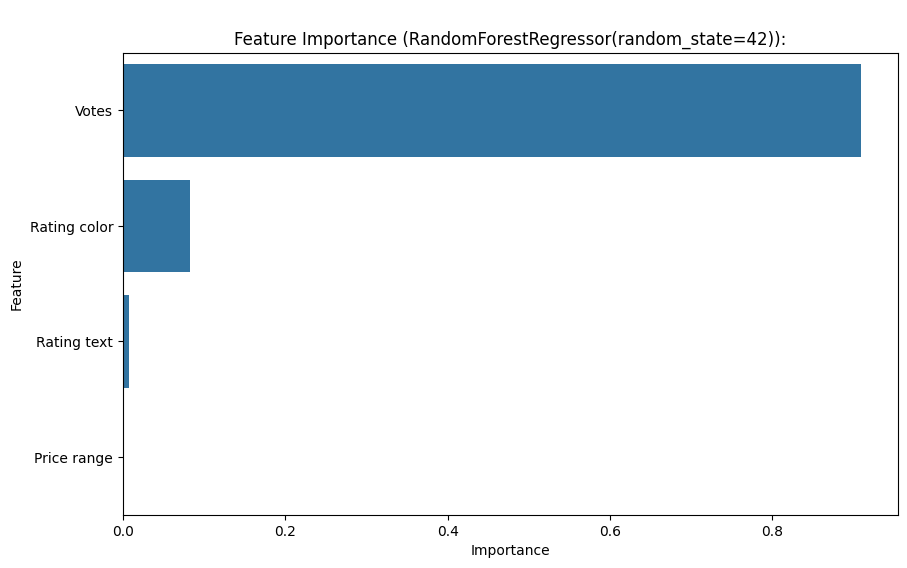

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title(f"\nFeature Importance ({best_model}):")
plt.show()

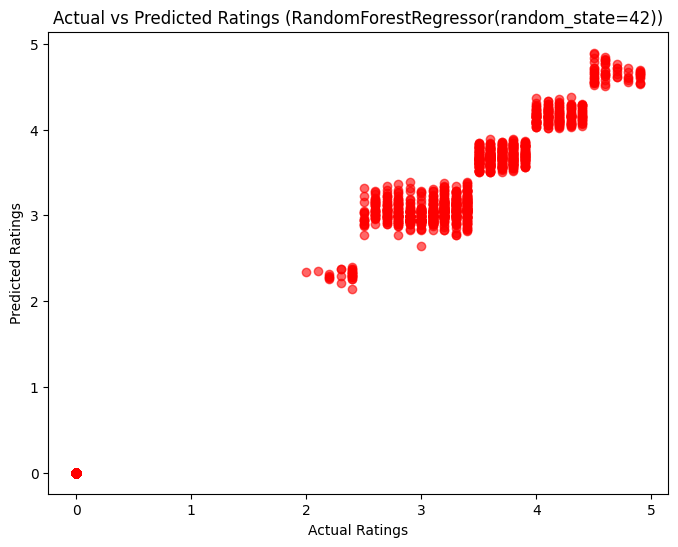

In [ ]:
# Actual vs Predicted Ratings
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_preds, alpha=0.6, color='r')
plt.title(f'Actual vs Predicted Ratings ({best_model})')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

In [ ]:
# Extract unique values from the dataset
# Clean values to ensure no special characters or extra spaces
rating_color_values = [str(color).strip() for color in data_frame['Rating color'].unique()]
rating_text_values = [str(text).strip() for text in data_frame['Rating text'].unique()]
price_range_values = sorted([int(price) for price in data_frame['Price range'].unique()])  # Ensure sorted numeric values

In [ ]:
import joblib

# Saving the best model to a file
joblib.dump(best_model, 'predict_restaurant_model.pkl')

print("Model saved as 'predict_restaurant_model.pkl'")

Model saved as 'best_model.pkl'


In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox
import joblib


# Loading the trained model
model = joblib.load("predict_restaurant_model.pkl")

class RestaurantRatingsApp:
    def __init__(self, master):
        self.master = master
        master.title("Restaurant Ratings Prediction App")
        master.geometry("500x600")  # Set the window size

        # Title
        self.label = tk.Label(master, text="Restaurant Ratings Predictor", font=("Helvetica", 16, "bold"))
        self.label.pack(pady=10)

        # Input fields
        self.create_input_field("Votes:", "int")
        self.create_dropdown_field("Rating Color:", rating_color_values)
        self.create_dropdown_field("Rating Text:", rating_text_values)
        self.create_dropdown_field("Price Range:", price_range_values)

        # Predict button
        self.predict_button = tk.Button(master, text="Predict Rating", command=self.predict_rating, font=("Helvetica", 12, "bold"), bg="green", fg="white")
        self.predict_button.pack(pady=20)

        # Result label
        self.result_label = tk.Label(master, text="", font=("Helvetica", 14), fg="blue")
        self.result_label.pack(pady=10)

    def create_input_field(self, label_text, input_type):
        """Create a labeled input field."""
        frame = tk.Frame(self.master)
        frame.pack(pady=5)

        label = tk.Label(frame, text=label_text, font=("Helvetica", 12))
        label.pack(side=tk.LEFT, padx=5)

        entry = tk.Entry(frame, font=("Helvetica", 12))
        entry.pack(side=tk.LEFT, padx=5)

        setattr(self, label_text.lower().replace(" ", "_").replace(":", ""), entry)

    def create_dropdown_field(self, label_text, options):
        """Create a labeled dropdown menu."""
        frame = tk.Frame(self.master)
        frame.pack(pady=5)

        label = tk.Label(frame, text=label_text, font=("Helvetica", 12))
        label.pack(side=tk.LEFT, padx=5)

        # Ensure dropdown options are strings
        options = [str(option) for option in options]

        combo = ttk.Combobox(frame, values=options, font=("Helvetica", 12))
        combo.pack(side=tk.LEFT, padx=5)
        combo.current(0)  # Set default value

        setattr(self, label_text.lower().replace(" ", "_").replace(":", ""), combo)

    def predict_rating(self):
        try:
            # Extract and preprocess user inputs
            votes = int(self.votes.get())  # Convert votes input to integer
            rating_color = self.rating_color.get()
            rating_text = self.rating_text.get()
            price_range = int(self.price_range.get())  # Convert price range to integer

            print(f"Votes: {votes}, Rating Color: {rating_color}, Rating Text: {rating_text}, Price Range: {price_range}")

            # Encode categorical inputs as necessary
            rating_color_encoded = rating_color_values.index(rating_color)
            rating_text_encoded = rating_text_values.index(rating_text)

            # Create input array for the model
            features = np.array([[votes, rating_color_encoded, rating_text_encoded, price_range]])

            # Predict rating
            predicted_rating = model.predict(features)[0]

            # Display result
            self.result_label.config(text=f"Predicted Rating: {predicted_rating:.2f}")

        except ValueError:
            messagebox.showerror("Input Error", "Please enter valid inputs.")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")


# Initialize Tkinter window
root = tk.Tk()
app = RestaurantRatingsApp(root)
root.mainloop()


TclError: no display name and no $DISPLAY environment variable